### **IMPORTAR BIBLIOTECAS**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from PIL import Image
import csv
import pandas as pd
from IPython.display import display as print_dataframe
import plotly.graph_objects as go 
from IPython.core.display import HTML 

***

 # **Parte 1**

***• EXERCÍCIO 1: Dado o array 2D abaixo, realize as seguintes operações:***  

***1. A média das linhas 0, 2 e 3.***  

***2. A média das colunas 0, 1 e 4.***  

***3. A soma dos elementos das duas diagonais (utilizando indexação).***  

***O seu código não deve conter nenhum tipo de loop (for/while)***

In [49]:
a = np.arange(25).reshape(5, 5)

# Fazer a média das linhas
media_lin=np.mean(a[0])
media_lin1=np.mean(a[1])
media_lin2=np.mean(a[2])

print ('1. A média das linhas 0 / 2 / 3, respectivamente é:', int(media_lin),'/' , int(media_lin1),'/' , int(media_lin2))

# Fazer a média das colunas
media_col=np.mean(a[:, 0])
media_col1=np.mean(a[:, 1])
media_col4=np.mean(a[:, 4])

print ('2. A média das colunas 0 / 1 / 4, respectivamente é:', int(media_col),'/' , int(media_col1),'/' , int(media_col4))

# Fazer a soma da diagonal principal e secundária
diagonal = np.trace(a)
diagonal2 = np.trace(a, axis2=1) 

print('3. A soma dos elementos das duas diagonais é:', diagonal + diagonal2) 

1. A média das linhas 0 / 2 / 3, respectivamente é: 2 / 7 / 12
2. A média das colunas 0 / 1 / 4, respectivamente é: 10 / 11 / 14
3. A soma dos elementos das duas diagonais é: 120


***• EXERCÍCIO 2: Dado o array 2D abaixo, selecione os valores pares e todos os valores maiores que 10:***  

In [50]:
a = np.arange(25).reshape(5, 5) 

# Selecionar valores maiores que 10
sel_dez = (a[2:5]) 

# Selecionar valores pares maiores que 10
sel_par = (sel_dez[sel_dez % 2==0])

print(sel_par)

[10 12 14 16 18 20 22 24]


***• EXERCÍCIO 3: Dado o array 2D abaixo, substitua os 5 menores valores por -1.***  

In [99]:
a = np.random.randint(0, 50, (5, 5))

# Ordenar e tranformar o Array 2D para Flat
x = (np.sort(a.flatten())[:25])

# Selecionar os valores de 0-5 e transformalos em -1
x[0:5] = -1

x.resize(5,5)

print(x)

[[-1 -1 -1 -1 -1]
 [11 12 14 15 19]
 [22 25 27 28 31]
 [37 37 37 38 38]
 [42 43 46 46 49]]


***• EXERCÍCIO 4: Calcule o número de pixels pretos contidos na imagem abaixo. Lembre-se, um pixel é considerado "preto" quando seu valor é zero nos 3 canais de cores ao mesmo tempo (e.g. image[0, 0, :] == 0 é verdadeiro se o pixel na posição [0, 0] for preto).***  

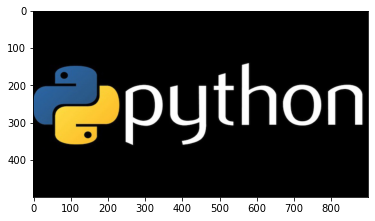

O número de pixels pretos na image é: 261696


In [52]:
# Importar imagem
image = np.array(Image.open('python_image.jpg'))
plt.imshow(image)
plt.show()

# Contar pixels totais
pixels = np.sum(np.sum(image, axis=2) == 0)

# Contar pixels que não são pretos
def contar_naopretos(image):
    return image.any(axis=-1).sum()

# Fazer a subtração dos pixels totais por não pretos
pixels_pretos = pixels - contar_naopretos(image)

print('O número de pixels pretos na image é:', pixels_pretos)

***• EXERCÍCIO 5: Escreva uma função que retorne os índices dos k maiores valores de um array. Teste sua implementação.***  

In [105]:
# Criando um random array com 5 valores
x = np.random.rand(5)

# Definindo valor do output
k = 2

# Funcão de ordenação por índices
def ind(x):
    return np.argsort(x)

# Funcão de ordenação do array por índices
def max(x):
    return x[ind(x)]

# Invertendo os valores de índice para retornar os maiores valores, limitados por K
maiores_valores = ind(x)[::-1][:k]

print('Lista original:', x, '\n' '-- -- --')

print('Indíce dos K maiores valores:', maiores_valores) 

Lista original: [0.38638049 0.74958704 0.92392737 0.9370544  0.60337315] 
-- -- --
Indíce dos K maiores valores: [3 2]


***• EXERCÍCIO 6: Leia o arquivo csv googleplaystore.csv e realize a seguinte atividade sobre o dataset:***  

***1. Faça um gráfico de barras contendo os top 5 apps por número de instalação.***

***2. Faça um gráfico de pizza (pie chart) mostrando as categorias de apps existentes no dataset de acordo com a frequência em que elas aparecem.***  

***3. Mostre qual o app mais caro existente no dataset.***  

***4. Mostre quantos apps são classificados como Mature 17+.***  

***5. Mostre o top 10 apps por número de reviews bem como o respectivo número de reviews. Ordene a lista de forma decrescente por número de reviews.***

App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres,Last Updated, Current Ver, Android Ver


<BarContainer object of 5 artists>

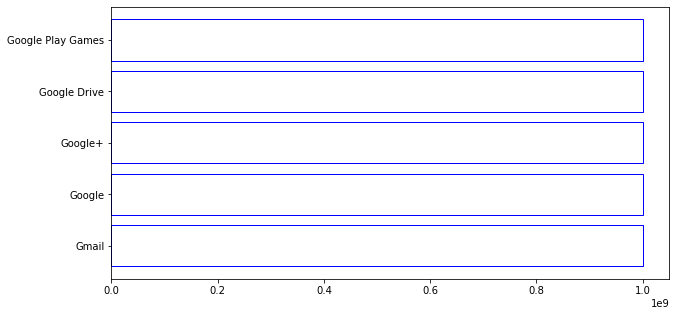

In [3]:
# 1. Faça um gráfico de barras contendo os top 5 apps por número de instalação.

dataset={
    'app' : [],
    'installs' : [],}

# Abrindo CSV, definindo a delimitação do arquivo por ","
with open('googleplaystore.csv', 'r', encoding='utf8') as f:
    arquivo_csv = csv.reader(f, delimiter= ',', quotechar='"')
    for i, row in enumerate(arquivo_csv):
        if i == 0:
            continue

# Retirando strings indesejados e convertendo em inteiro
        row[5] = row[5].replace('+','')
        row[5] = row[5].replace(',','')
        row[5] = row[5].replace('Free','0')
        row[5] = (int(row[5]))

# Definindo cada coluna
        dataset['app'].append(row[0])
        dataset['installs'].append(row[5])

# Transformando em array
for k in dataset.keys():
    dataset[k] = np.array(dataset[k])

# Definindo critério
criterio = 'installs'

# Ordenando critério por número de instalações
top_5 = np.argsort(dataset[criterio])[::-1][:5]

app = []
installs = []

# Conectando as linhas com seu respectivo index
for i in top_5:
    app.append(dataset['app'][i])
    installs.append(dataset['installs'][i])

plt.figure(figsize=(10,5))
plt.barh(app, installs,  fill = False, edgecolor = 'Blue') 

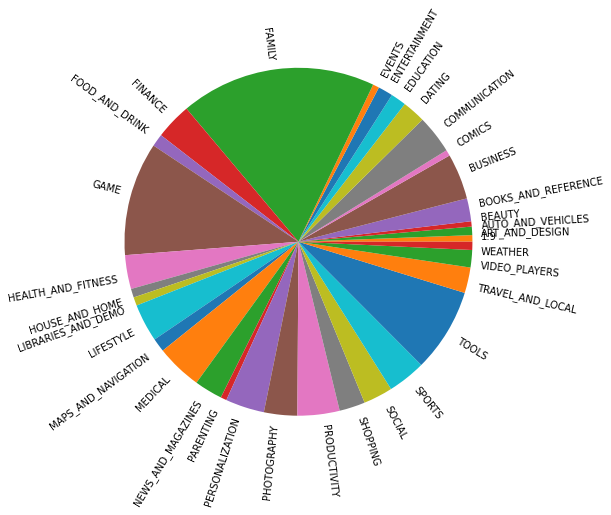

In [4]:
# 2. Faça um gráfico de pizza (pie chart) mostrando as categorias de apps existentes no dataset de acordo com a frequência em que elas aparecem.

dataset={
    'app' : [],
    'category' : [],}

# Abrindo CSV, definindo a delimitação do arquivo por ","
with open('googleplaystore.csv', 'r', encoding='utf8') as f:
    arquivo_csv = csv.reader(f, delimiter= ',', quotechar='"')
    for i, row in enumerate(arquivo_csv):
        if i == 0:
            continue 

# Definindo cada coluna
        dataset['app'].append(row[0])
        dataset['category'].append(row[1])

for k in dataset.keys():
    dataset[k] = np.array(dataset[k])

# Definindo critério
criterio = 'category'

# Fazendo um sort_values por método dúvido do numpy
unique, counts = np.unique(dataset[criterio], return_counts=True)

# Criando dicionario que liga a colunas "unique" com o contador "counts"

dicionario = dict(zip(unique, counts))

labels = []
sizes = []

for x, y in dicionario.items():
    labels.append(x)
    sizes.append(y)

# Plotando gráfico

plt.pie(sizes, labels=labels, radius = 2, labeldistance = 1.05, counterclock = True, rotatelabels=True)
plt.show()

In [28]:
# 3. Mostre qual o app mais caro existente no dataset.

dataset={
    'app' : [],
    'price' : [],}

# Abrindo CSV, definindo a delimitação do arquivo por ","
with open('googleplaystore.csv', 'r', encoding='utf8') as f:
    arquivo_csv = csv.reader(f, delimiter= ',', quotechar='"')
    for i, row in enumerate(arquivo_csv):
        if i == 0:
            continue 

# Retirando strings indesejados e convertendo em float
        row[7] = row[7].replace('$','')
        row[7] = row[7].replace('Everyone','0')
        row[7] = (float(row[7]))

# Definindo cada coluna
        dataset['app'].append(row[0])
        dataset['price'].append(row[7])

for k in dataset.keys():
    dataset[k] = np.array(dataset[k])

# Definindo critério
criterio = 'price'

# Retirando o index referente ao maior valor encontrado
mais_caro = np.argmax(dataset[criterio])

app = []
preco = []

# Ligando o index encontrado com o nome e preço do aplicativo
app.append(dataset['app'][mais_caro])
preco.append(dataset['price'][mais_caro])

print('Nome do app:', app, 'Preço do aplicativo:', '$',preco) 

Nome do app: ["I'm Rich - Trump Edition"] Preço do aplicativo: $ [400.0]


In [7]:
# 4. Mostre quantos apps são classificados como Mature 17+.

dataset_1={
    'app' : [],
    'content rating' : [],}

# Abrindo CSV, definindo a delimitação do arquivo por ","
with open('googleplaystore.csv', 'r', encoding='utf8') as f:
    arquivo_csv = csv.reader(f, delimiter= ',', quotechar='"')
    for i, row in enumerate(arquivo_csv):
        if i == 0:
            continue 
        if(row[0] not in dataset_1['app']):    
# Definindo cada coluna
            dataset_1['app'].append(row[0])
            dataset_1['content rating'].append(row[8])
        else:
            continue
for k in dataset_1.keys():
    dataset_1[k] = np.array(dataset_1[k])

# Definindo critério
criterio = 'content rating'

# Criando dicionario que liga a colunas "unique" com o contador "counts"
unique, counts = np.unique(dataset_1[criterio], return_counts=True)

dicionario = dict(zip(unique, counts))

# Printando o contador relativo a coluna "unique", que satifaz o resultado "Mature 17+"
for unique, counts in dicionario.items():
    if unique == 'Mature 17+':
        print ('O número de apps classificados como Mature 17+ são:', counts) 

O número de apps classificados como Mature 17+ são: 393


In [7]:
# 5. Mostre o top 10 apps por número de reviews bem como o respectivo número de reviews. Ordene a lista de forma decrescente por número de reviews.

dataset={
    'app' : [],
    'reviews' : [],}

# Abrindo CSV, definindo a delimitação do arquivo por ","
with open('googleplaystore.csv', 'r', encoding='utf8') as f:
    arquivo_csv = csv.reader(f, delimiter= ',', quotechar='"')
    for i, row in enumerate(arquivo_csv):
        if i == 0:
            continue

# Retirando strings indesejados e convertendo em inteiro
        row[3] = row[3].replace('+','')
        row[3] = row[3].replace('3.0M','0')
        row[3] = (int(row[3]))

# Definindo cada coluna
        dataset['app'].append(row[0])
        dataset['reviews'].append(row[3])

for k in dataset.keys():
    dataset[k] = np.array(dataset[k])

# Definindo critério
criterio = 'reviews'

# Ordenando critério por número de reviews
top_10 = np.argsort(dataset[criterio])[::-1][:30]

app = []
reviews = []

for i in top_10:
    app.append(dataset['app'][i])
    reviews.append(dataset['reviews'][i])

dicionario = dict(zip(app, reviews))

dicionario

{'Facebook': 78128208,
 'WhatsApp Messenger': 69109672,
 'Instagram': 66509917,
 'Messenger – Text and Video Chat for Free': 56642847,
 'Clash of Clans': 44881447,
 'Clean Master- Space Cleaner & Antivirus': 42916526,
 'Subway Surfers': 27711703,
 'YouTube': 25623548,
 'Security Master - Antivirus, VPN, AppLock, Booster': 24900999,
 'Clash Royale': 23125280}

***

 # **Parte 2**

***• EXERCÍCIO 1: Dada a distribuição normal 2D centralizada em 3 mostrada abaixo. Remova a média do das colunas (x, y) para centralizar a distribuição em zero.***  

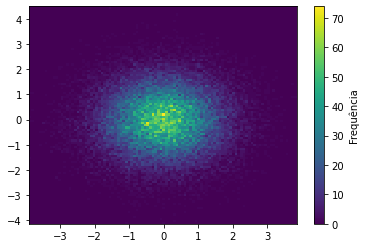

A média do coluna X é: 0.0010118405126132142
A média do coluna Y é: 0.00020671561380561642


In [54]:
a = np.random.normal(loc=0, size=(50000, 2))
plt.hist2d(a[:, 0], a[:, 1], bins=100)
cbar = plt.colorbar()
cbar.ax.set_ylabel('Frequência')
plt.show() 

# Calcular média das colunas (x, y)
media_colx=np.mean(a[:, 0])
media_coly=np.mean(a[:, 1])

print('A média do coluna X é:', media_colx)
print('A média do coluna Y é:', media_coly)

***• EXERCÍCIO 2: Calcule a média de cada um dos canais da imagem abaixo (RGB), após calcular a média, para cada pixel da imagem, remova a média do seu respectivo canal.***  

In [ ]:
image = np.array(Image.open('python_image.jpg'))
print('Shape da imagem: {}, dtype: {}'.format(image.shape, image.dtype))
plt.imshow(image)
plt.show() 

image.mean(axis=(1,2))

***• EXERCÍCIO 3: Faça a normalização dos dados a seguir utilizando a abordagem Z-score. A abordagem Z-score consiste em centralizar os dados em 0 (remover a média) e corrigir deformidades. A fórmula da normalização é a seguir:***  

***x_{i} = \frac{x_{i} - \mu_{i}}{\sigma_{i}} Onde x_{i}xi é um atributo do dataset.***  

(178, 4)


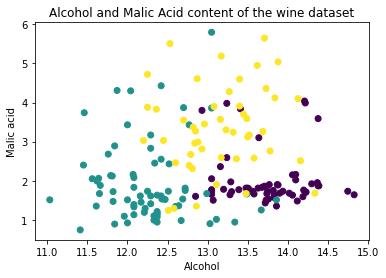

In [57]:
# Importação de dados
dataset = np.loadtxt('wine_data.csv', delimiter=',')
dataset = dataset[:, :4] # ['Class label', 'Alcohol', 'Malic acid']
print(dataset.shape)
plt.scatter(dataset[:, 1], dataset[:, 2], c=dataset[:, 0])
plt.title('Alcohol and Malic Acid content of the wine dataset')
plt.xlabel('Alcohol')
plt.ylabel('Malic acid')
plt.show()

# Fórmula para normalização dos dados
df_zscore = (dataset - dataset.mean())/dataset.std()

***• EXERCÍCIO 4: Dada a função abaixo que recebe 3 vértices 2D (3x2) e plota o triângulo correspondente, calcule o centro do triângulo e utilize a função plot_triangle para plotar o triângulo juntamente com o seu centro***  

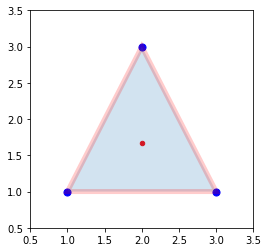

In [58]:
# Plotar Triângulo
def plot_triangle(vertices, center=None):

    trishape = plt.Polygon(vertices, edgecolor='r', alpha=0.2, lw=5)
    _, ax = plt.subplots(figsize=(4, 4))
    ax.add_patch(trishape)
    ax.set_ylim([.5, 3.5])
    ax.set_xlim([.5, 3.5])

    if center is not None:
      ax.scatter(*center, color='g', marker='D', s=70)
    ax.scatter(vertices[:, 0], vertices[:, 1], color='b', s=50)
    # Defini o centro do circulo com plt.scatter
    plt.scatter(X1, Y1,s=20,c='red')
    plt.show()

coordenadas = np.array([[1, 1],[3, 1],[2, 3]]) 

# Soma as colunas relativas a X e Y
XY = np.sum(coordenadas, axis=0)

# Atribui a X1 e Y1 seus respectivos valores
X1 = (XY[0])
Y1 = (XY[1])

# Divide a soma das colunas X e Y para ter como resultado o baricentro do triângulo
X1 = X1/3
Y1 = Y1/3

plot_triangle(coordenadas)

***• EXERCÍCIO 5: Dado o array 2D abaixo, normalize cada linha pela sua própria norma L2. A fórmula da normalização L2 é a seguinte:***  

In [ ]:
a = np.random.normal(size=(20, 100))
# Norma L2

def norm(x):
    return [(a - np.min(a))/ (np.max(a) - np.min(a))]

print(norm(x))

***

 # **Parte 3**

***• EXERCÍCIO 1: Leia o arquivo actors.csv e faça os seguintes cálculos sobre o conjunto de dados utilizando Pandas:***  

***1. O ator/atriz com maior número de filmes e o respectivo número de filmes.***  

***2. A média do número de filmes.***  

***3. O ator/atriz com a maior média por filme.***  

***4. O nome do(s) filme(s) mais frequente(s) e sua respectiva frequência.***  

In [ ]:
#1. O ator/atriz com maior número de filmes e o respectivo número de filmes.

# Ler CSV e definir nomes das colunas
df=pd.read_csv('actors.csv')
df.rename(columns={'Actor': 'Ator', 'Total Gross': 'TotalGross', 'Number of Movies': 'NumeroDeFilmes', 'Average per Movie': 'MediaPorFilmes', '#1 Movie': '1#Filme', 'Gross': 'Gross'}, inplace=True)

# Achar o maior número de filmes
Filmes=df['NumeroDeFilmes'].max()

# Localizar Número de filmes que é igual a .max()
df.loc[df['NumeroDeFilmes'] == Filmes] 

In [ ]:
#2. A média do número de filmes.

# Achar a média do número de filmes
df_mean = df["NumeroDeFilmes"].mean()

print('A média do número de filmes é:', round(df_mean))

In [ ]:
#3. O ator/atriz com a maior média por filme.

# Achar a maior média por filmes
Media=df['MediaPorFilmes'].max()

# Localizar Média de filmes que é igual a .max()
df.loc[df['MediaPorFilmes'] == Media] 

In [ ]:
#4. O nome do(s) filme(s) mais frequente(s) e sua respectiva frequência.

# Achar o filmes mais frequente
Frequencia=df['Gross'].max()

# Localizar Filme que é igual a .max()
df.loc[df['Gross'] == Frequencia] 

***• EXERCÍCIO 2: Leia o arquivo csv googleplaystore.csv e realize as seguintes atividades sobre o dataset utilizando Pandas:***  

***1. Faça um gráfico de barras contendo os top 5 apps por número de instalação.***  

***2. Faça um gráfico de pizza (pie chart) mostrando as categorias de apps existentes no dataset de acordo com a frequência em que elas aparecem.***  

***3. Mostre qual o app mais caro existente no dataset.***  

***4. Mostre quantos apps são classificados como Mature 17+.***  

***5. Mostre o top 10 apps por número de reviews bem como o respectivo número de reviews. Ordene a lista de forma decrescente por número de reviews.***

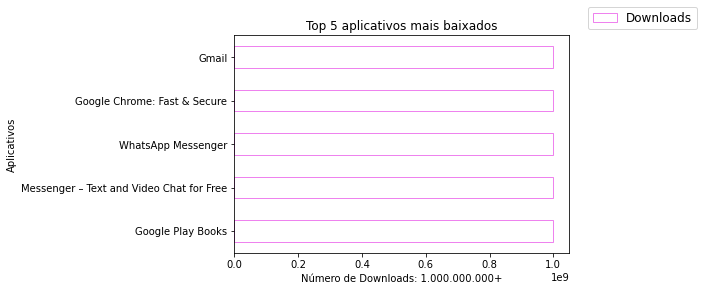

In [2]:
# Ler CSV
df_google=pd.read_csv('googleplaystore.csv', sep=',')
pd.options.mode.chained_assignment = None 

# Remover simbolos e strings indesejados
instalacao = df_google['Installs'].str.replace('+','', regex=True).str.replace('Free','0').str.replace(',','')

# Merge dos dataframas para juntar com a colunas "Installs_y"
df_merge = pd.merge(df_google, instalacao, left_index=True, right_index=True, how='outer')

# Transformar conteúdo string em Float
x = instalacao.astype(float)

# Ordenar por ordem decrescente limitado a 5 outputs
x = x.sort_values(ascending=False, kind='stable')[:5]

# Retirar o index dos 5 valores e conectalos com o df
index = x.index
data = df_merge.iloc[index]
data['Installs_y']=data['Installs_y'].astype(float)

# Plotar os valores
data.plot.barh(x='App', y='Installs_y', fill = False, edgecolor = 'Violet') 
plt.title('Top 5 aplicativos mais baixados')
plt.xlabel('Número de Downloads: 1.000.000.000+')
plt.ylabel('Aplicativos')
plt.legend(['Downloads'], loc= 4, bbox_to_anchor=(0.5, 1., 0.9, 0.5), fontsize=12) 

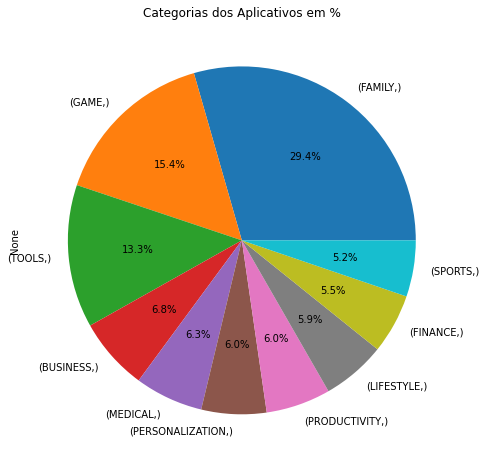

In [23]:
# 2. Faça um gráfico de pizza (pie chart) mostrando as categorias de apps existentes no dataset de acordo com a frequência em que elas aparecem.

# Contar número de categotias e plotar
categorias = df_google[['Category']].value_counts()[:10].plot.pie(figsize=(8, 8), autopct='%1.1f%%', title='Categorias dos Aplicativos em %')

In [22]:
# 3. Mostre qual o app mais caro existente no dataset.

# Remover simbolos e strings indesejados
preco = df_google['Price'].str.replace('$','', regex=True).str.replace('Everyone','0', regex=True)

# Transformar em valor numérico
maior_preco = pd.to_numeric(preco)

# Selecionar index do valor mais alto
x = maior_preco.idxmax()

# Transformar em um df
df_google.loc[x].to_frame()

,4367
App,I'm Rich - Trump Edition
Category,LIFESTYLE
Rating,3.6
Reviews,275
Size,7.3M
Installs,"10,000+"
Type,Paid
Price,$400.00
Content Rating,Everyone
Genres,Lifestyle


***

In [21]:
# 4. Mostre quantos apps são classificados como Mature 17+.

# Contar o número da tabela content rating e selecionar por "Mature +17"

df_google = df_google.drop_duplicates('App')

classificacao = df_google[['Content Rating']].value_counts().rename(index='Número de aplicativos 17+').loc['Mature 17+'] 

# Transformar em um df
classificacao.to_frame()

,Número de aplicativos 17+
Content Rating,
Mature 17+,393


In [3]:
# 5. Mostre o top 10 apps por número de reviews bem como o respectivo número de reviews. Ordene a lista de forma decrescente por número de reviews.

x = df_google['Reviews'].str.rstrip('.+').str.replace('3.0M','0', regex=True)

# Transformar em valor numérico
maior_review = pd.to_numeric(x)

# Definir os 10 maiores por index
index = maior_review.sort_values(ascending=False)[:10].to_frame().index

# Selecionar por index
df_google[['App', 'Reviews']].iloc[index] 

,App,Reviews
2544,Facebook,78158306
3943,Facebook,78128208
381,WhatsApp Messenger,69119316
336,WhatsApp Messenger,69119316
3904,WhatsApp Messenger,69109672
2604,Instagram,66577446
2611,Instagram,66577313
2545,Instagram,66577313
3909,Instagram,66509917
382,Messenger – Text and Video Chat for Free,56646578


 # **Parte 4**

***• EXERCÍCIO 1: Leia os arquivos fifa19_info.csv e o arquivo fifa19_stats.csv e realize os seguintes cálculos sobre o conjunto de dados:***  

***1. Calcule a média de agilidade dos jogadores do Barcelona e do Real Madrid.***  

***2. Faça um gráfico de barras com os top 10 clubes de acordo com a soma de valor seus jogadores.***  

***3. Mostre os top 5 países que mais possuem jogadores no conjunto de dados.***  

***4. Mostre a foto (virtual e real) dos top 5 jogadores de acordo com a habilidade absoluta (Overall).***  

***5. Mostre qual é o jogador mais velho e mais novo.***  

***6. Faça um gráfico de dispersão que contém o top 10 jogadores de acordo com a habilidade absoluta (Overall) no eixo X e sua habilidade em bater pênaltis (Penalties) no eixo y.***  

***7. Mostre qual o clube que contém, em média, os melhores batedores de pênalti.***  

***8. Mostre qual o clube que contém, em média, os jogadores mais caros.***  

***9. Faça um gráfico de radar dos Jogadores L. Messi, Sergio Ramos e De Gea. Utilize os atributos Balance, Stamina, ShotPower, Marking, Dribling, SprintSpeed, Strength, Slidin gTackle e GKReflexes. Verifique o intervalo dos dados, talvez seja necessário normalizar.***

In [38]:
# Ler os dois CSV's
info=pd.read_csv('fifa19_info.csv', sep=',')
info2=pd.read_csv('fifa19_info2.csv', sep=',')
stats=pd.read_csv('fifa19_stats.csv', sep=',')

# Merge entre as duas tabelas
merge_df = pd.merge(info, stats, how = 'inner', on = 'ID') 

In [65]:
# 1 - Calcule a média de agilidade dos jogadores do Barcelona e do Real Madrid.

# Media de agilidade Barcelona
media_barc = merge_df.loc[merge_df.Club == 'FC Barcelona', 'Agility'].mean()

# Media de agilidade Real Madrid
media_real = merge_df.loc[merge_df.Club == 'Real Madrid', 'Agility'].mean()

print(f'A média de agilidade dos jogadores do Barcelona é: {media_barc:.2f}')
print(f'A média de agilidade dos jogadores do Real Madrid é: {media_real:.2f}')

A média de agilidade dos jogadores do Barcelona é: 69.21
A média de agilidade dos jogadores do Real Madrid é: 68.76


<AxesSubplot:title={'center':'Top 10 clubes de acordo com a soma de valor seus jogadores'}, xlabel='Club'>

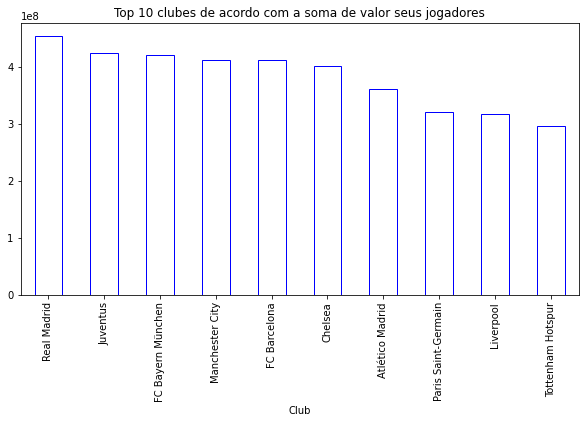

In [22]:
# 2 - Faça um gráfico de barras com os top 10 clubes de acordo com a soma de valor seus jogadores.

# Fazer um replace de todos os valores indesejados da coluna "Value"
Valor = info['Value'].apply(lambda x: str(x).replace('€','')).apply(lambda x: str(x).replace('M','000000')).apply(lambda x: str(x).replace('K','000'))

Valor.to_frame()

# Juntar as tabelas Info e Valor
df_merge = pd.merge(info, Valor, left_index=True, right_index=True, how='outer')

# Transformar a colunas "Value_y" em numérica
df_merge['Value_y'] = pd.to_numeric(df_merge['Value_y'], errors='coerce')

# Agrupar por Clube e somar a colunas "Value_y" para obter a soma de todos os jogadores
x = df_merge.groupby(['Club'])['Value_y'].sum().sort_values(ascending=False)[:10]

# Plotar Gráfico
plt.figure(figsize=(10,5))

x.plot.bar(title='Top 10 clubes de acordo com a soma de valor seus jogadores', rot=90,  fill = False, edgecolor = 'Blue')

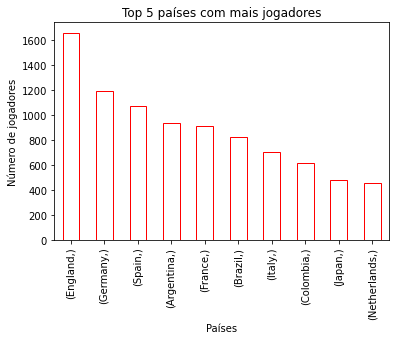

In [67]:
# 3 - Mostre os top 5 países que mais possuem jogadores no conjunto de dados.

# Contar os valores da coluna nacionalidade, definir limite de outputs como '5' e plotar o gráfico
top = info[['Nationality']].value_counts()[:10].plot.bar(fill = False, edgecolor = 'Red')
plt.title('Top 5 países com mais jogadores')
plt.xlabel('Países')
plt.ylabel('Número de jogadores')

plt.show()

In [68]:
# 4 - Mostre a foto (virtual e real) dos top 5 jogadores de acordo com a habilidade absoluta (Overall).

# Me dei a liberdade de alterar o banco de dados pricipal pois as URL's antigas não existiam mais
# Como são apenas 5 jogadores, alterei as imagens manualmente, apenas deles

# Seleciona dataframe por Overall limitado a 5 outputs
PhotosTop5 = info2[:5]

# Limita as colunas por Nome e Foto
PhotosTop5 = PhotosTop5[['Name', 'Photo']]

# Funcão para importar as fotos dos jogadores por URL
def path_to_image_html(path):
    return '<img src="'+ path + '" width="60" >'

PhotosTop5.to_html(escape=False, formatters=dict(Photo=path_to_image_html))

HTML(PhotosTop5.to_html(escape=False,formatters=dict(Photo=path_to_image_html)))

,Name,Photo
0,L. Messi,
1,Cristiano Ronaldo,
2,Neymar Jr,
3,De Gea,
4,K. De Bruyne,


In [15]:
#5 - Mostre qual é o jogador mais velho

# Localizar o jogador mais velho pela coluna "Age", selecionar por seu index e transformar em um df para melhor vizualização
info.loc[info['Age'].idxmax()].to_frame() 

,4741
ID,140029
Name,O. Pérez
Club,Pachuca
Photo,https://cdn.sofifa.org/players/4/19/140029.png
Flag,https://cdn.sofifa.org/flags/83.png
Nationality,Mexico
Club Logo,https://cdn.sofifa.org/teams/2/light/110147.png
Value,€160K
International Reputation,2.0
Age,45


In [70]:
#5.1 - Mostre qual é o jogador mais novo

# Localizar o jogador mais novo pela coluna "Age", selecionar por seu index e transformar em um df para melhor vizualização
info.loc[info['Age'].idxmin()].to_frame() 

,11457
ID,241266
Name,W. Geubbels
Club,AS Monaco
Photo,https://cdn.sofifa.org/players/4/19/241266.png
Flag,https://cdn.sofifa.org/flags/18.png
Nationality,France
Club Logo,https://cdn.sofifa.org/teams/2/light/69.png
Value,€1M
International Reputation,1.0
Age,16


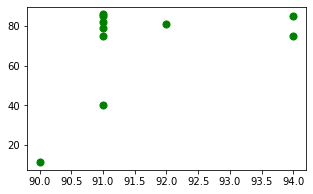

In [19]:
# 6 - Faça um gráfico de dispersão que contém o top 10 jogadores de acordo com a habilidade absoluta (Overall) no eixo X e sua habilidade em bater pênaltis (Penalties) no eixo y.

# Selecionar o jogadores pela tabela "Name" e "Penalties"
overall = merge_df[['Overall', 'Penalties']]

# Definir limite de output em 10 valores
overall2 = overall.head(10)

# Plotar gráfico
plt.figure(figsize=(5,3))
plt.scatter(overall2['Overall'], overall2['Penalties'],s=50,c='green')

In [21]:
# 7. Mostre qual o clube que contém, em média, os melhores batedores de pênalti.

# Agrupar dataframe por Clube, definir a média da tabela "Penalties" de modo decrescente limitado a 1 output
x = merge_df.groupby(['Club'])['Penalties'].mean().sort_values(ascending=False).rename(index='Média/Pênaltis')[:1]

x.to_frame()

,Média/Pênaltis
Club,
Grêmio,60.7


In [8]:
# 8. Mostre qual o clube que contém, em média, os jogadores mais caros.

# Fazer um replace de todos os valores indesejados da coluna "Value"
Valor = info['Value'].apply(lambda x: str(x).replace('€','')).apply(lambda x: str(x).replace('M','000000')).apply(lambda x: str(x).replace('K','000'))

# Transformar para df
Valor.to_frame()

# Merge entre as tabelas "info" e "Valor"
df_merge = pd.merge(info, Valor, left_index=True, right_index=True, how='outer')

# Transformar coluna "Value_y" para numeric
df_merge['Value_y'] = pd.to_numeric(df_merge['Value_y'], errors='coerce')

# Agrupar dataframe por Clube, definir a soma da tabela "Value_y" de modo decrescente
soma = df_merge.groupby(['Club'])['Value_y'].sum().sort_values(ascending=False)

club_cont = df_merge.value_counts('Club')

x = merge_df.groupby(['Club'])['Penalties']

NameError: name 'info' is not defined

In [47]:
# 9. Faça um gráfico de radar dos Jogadores L. Messi, Sergio Ramos e De Gea. Utilize os atributos Balance, Stamina, ShotPower, Marking, Dribling, SprintSpeed, Strength, Slidin gTackle e 
# GKReflexes. Verifique o intervalo dos dados, talvez seja necessário normalizar. 

# Definir variável que recebe o status que foi pedido, de acordo com o nome do jogador(Lionel Messi)

Balance = merge_df.loc[merge_df.Name == 'L. Messi', 'Balance'].min()

Stamina = merge_df.loc[merge_df.Name == 'L. Messi', 'Stamina'].min()

ShotPower = merge_df.loc[merge_df.Name == 'L. Messi', 'ShotPower'].min()

Marking = merge_df.loc[merge_df.Name == 'L. Messi', 'Marking'].min()

Dribbling = merge_df.loc[merge_df.Name == 'L. Messi', 'Dribbling'].min()

SprintSpeed = merge_df.loc[merge_df.Name == 'L. Messi', 'SprintSpeed'].min()

Strength = merge_df.loc[merge_df.Name == 'L. Messi', 'Strength'].min()

GKReflexes = merge_df.loc[merge_df.Name == 'L. Messi', 'GKReflexes'].min()

# Definir variável que recebe o status que foi pedido, de acordo com o nome do jogador(Sergio Ramos)

Balance2 = merge_df.loc[merge_df.Name == 'Sergio Ramos', 'Balance'].min()

Stamina2 = merge_df.loc[merge_df.Name == 'Sergio Ramos', 'Stamina'].min()

ShotPower2 = merge_df.loc[merge_df.Name == 'Sergio Ramos', 'ShotPower'].min()

Marking2 = merge_df.loc[merge_df.Name == 'Sergio Ramos', 'Marking'].min()

Dribbling2 = merge_df.loc[merge_df.Name == 'Sergio Ramos', 'Dribbling'].min()

SprintSpeed2 = merge_df.loc[merge_df.Name == 'Sergio Ramos', 'SprintSpeed'].min()

Strength2 = merge_df.loc[merge_df.Name == 'Sergio Ramos', 'Strength'].min()

GKReflexes2 = merge_df.loc[merge_df.Name == 'Sergio Ramos', 'GKReflexes'].min()

# Definir variável que recebe o status que foi pedido, de acordo com o nome do jogador(De Gea)

Balance3 = merge_df.loc[merge_df.Name == 'De Gea', 'Balance'].min()

Stamina3 = merge_df.loc[merge_df.Name == 'De Gea', 'Stamina'].min()

ShotPower3 = merge_df.loc[merge_df.Name == 'De Gea', 'ShotPower'].min()

Marking3 = merge_df.loc[merge_df.Name == 'De Gea', 'Marking'].min()

Dribbling3 = merge_df.loc[merge_df.Name == 'De Gea', 'Dribbling'].min()

SprintSpeed3 = merge_df.loc[merge_df.Name == 'De Gea', 'SprintSpeed'].min()

Strength3 = merge_df.loc[merge_df.Name == 'De Gea', 'Strength'].min()

GKReflexes3 = merge_df.loc[merge_df.Name == 'De Gea', 'GKReflexes'].min()

# Definir o nomes de cada categorias
categories = ['Balance', 'Stamina', 'ShotPower', 'Marking', 'Dribbling', 'SprintSpeed', 'Strength', 'GKReflexes']

categories = [*categories, categories[0]]

# Definir os objetivos para a plotagem Scatter de acordo com cada jogador
L_Messi = [Balance, Stamina, ShotPower, Marking, Dribbling, SprintSpeed, Strength, GKReflexes]

Sergio_Ramos = [Balance2, Stamina2, ShotPower2, Marking2, Dribbling2, SprintSpeed2, Strength2, GKReflexes2]

De_Gea = [Balance3, Stamina3, ShotPower3, Marking3, Dribbling3, SprintSpeed3, Strength3, GKReflexes3]

L_Messi = [*L_Messi, L_Messi[0]]

Sergio_Ramos = [*Sergio_Ramos, Sergio_Ramos[0]]

De_Gea = [*De_Gea, De_Gea[0]]

# Plotar o Polar Chart pela biblioteca 'graph_objects'

fig = go.Figure(
    data=[
        go.Scatterpolar(r=L_Messi, theta=categories, name='Messi'),
        go.Scatterpolar(r=Sergio_Ramos, theta=categories, name='Sergio Ramos'),
        go.Scatterpolar(r=De_Gea, theta=categories, name='De Gea')
    ],
    layout=go.Layout(
        title=go.layout.Title(text='Comparação entre Messi, Sergio Ramos e De Gea'),
        polar={'radialaxis': {'visible': True}},
        showlegend=True
    )
)

fig.show() 